In [ ]:
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read JSON files
Sentimentreviews_df = pd.read_json('/content/drive/MyDrive/NUS/Assignment 1 Topic /project-yelp/data/yelp_dataset_review-filtered-sentiment.json')

In [ ]:
Sentimentreviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment_result
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Positive
31,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34,Positive
49,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,Positive
67,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5,0,0,0,"Traveling through in our RV, stopped over in G...",2016-07-21 17:41:18,Positive
73,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,1,0,0,"If I could give it a zero, I would. I order a ...",2011-08-24 23:07:08,Negative


In [ ]:
# Assuming Sentimentreviews_df is a DataFrame with a 'stars' column
star_counts = Sentimentreviews_df["stars"].value_counts().to_dict()

In [ ]:
star_count = Sentimentreviews_df["stars"].value_counts().reset_index()
star_count.columns = ["stars", "count"]

In [ ]:
# Print the unique star value counts
for stars, count in star_count.items():
    print(f"{stars} stars: {count} occurrences")

stars stars: 0    5
1    4
2    1
3    3
4    2
Name: stars, dtype: int64 occurrences
count stars: 0    163622
1    101861
2     81316
3     55317
4     43815
Name: count, dtype: int64 occurrences


In [ ]:
# Assuming Sentimentreviews_df is a DataFrame with a 'stars' column
star_counts = Sentimentreviews_df["stars"].value_counts()

# Iterate over the unique star values and their counts
for stars, count in star_counts.items():
    print(f"{stars} stars: {count} occurrences")


5 stars: 163622 occurrences
4 stars: 101861 occurrences
1 stars: 81316 occurrences
3 stars: 55317 occurrences
2 stars: 43815 occurrences


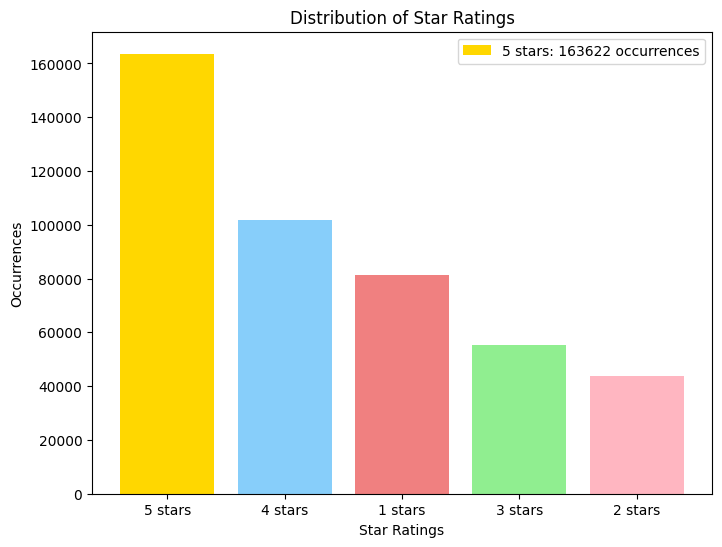

In [ ]:
star_count = {
    "5 stars": 163622,
    "4 stars": 101861,
    "1 stars": 81316,
    "3 stars": 55317,
    "2 stars": 43815
}

stars = list(star_count.keys())
occurrences = list(star_count.values())

colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 6))
plt.bar(stars, occurrences, color=colors)
plt.xlabel('Star Ratings')
plt.ylabel('Occurrences')
plt.title('Distribution of Star Ratings')

# Adding a legend
legend_labels = [f'{star}: {count} occurrences' for star, count in star_count.items()]
plt.legend(legend_labels, loc='upper right')


In [ ]:
# Filter rows with 5 Star DF
FiveStar= Sentimentreviews_df[Sentimentreviews_df["stars"] == 5]

In [ ]:
FiveStar.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment_result
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Positive
31,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34,Positive
49,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,Positive
67,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5,0,0,0,"Traveling through in our RV, stopped over in G...",2016-07-21 17:41:18,Positive
142,1TsJMk7OT7MUSNLQoFc2wA,8dpPXJj1JlOE4acEcowUfQ,s3FRhtaNU8dt-mKkLKUQaQ,5,0,0,1,I LOVE this place! I have been coming here fo...,2012-06-26 19:54:20,Positive


In [ ]:
# implied through this check vader sentiment working, Positive correctly represented
FiveStar.sentiment_result.value_counts() / len(FiveStar)

Positive    0.983694
Negative    0.011857
Neutral     0.004449
Name: sentiment_result, dtype: float64

In [ ]:
# Assuming Sentimentreviews_df is your DataFrame
FiveStar = Sentimentreviews_df[Sentimentreviews_df["stars"] == 5]
sentiment_distribution = FiveStar['sentiment_result'].value_counts() / len(FiveStar)


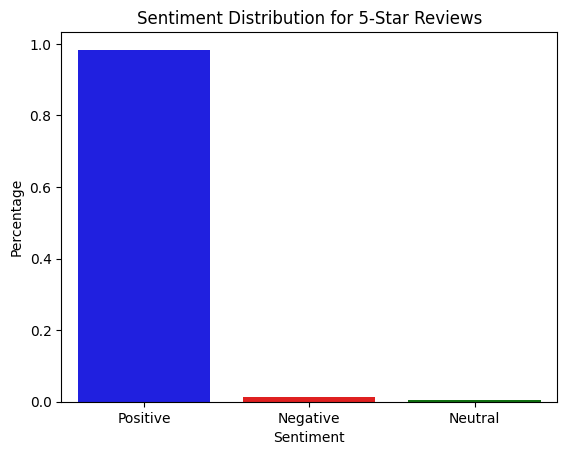

In [ ]:
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=['blue', 'red', 'green'])
plt.title('Sentiment Distribution for 5-Star Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


In [ ]:
# Filter rows with 1 Star DF
first = Sentimentreviews_df[Sentimentreviews_df["stars"] == 1]

# Filter rows with 2 Star DF
second = Sentimentreviews_df[Sentimentreviews_df["stars"] == 2]

OneStar = pd.concat([first, second])

In [ ]:
# implied through this check vader sentiment working correctly. Negative Result is underpresented e.g good review but mark 1 star
OneStar.sentiment_result.value_counts() / len(OneStar)

Negative    0.530820
Positive    0.432667
Neutral     0.036514
Name: sentiment_result, dtype: float64

In [ ]:
 OneStarsentiment_distribution = OneStar['sentiment_result'].value_counts() / len(OneStar)

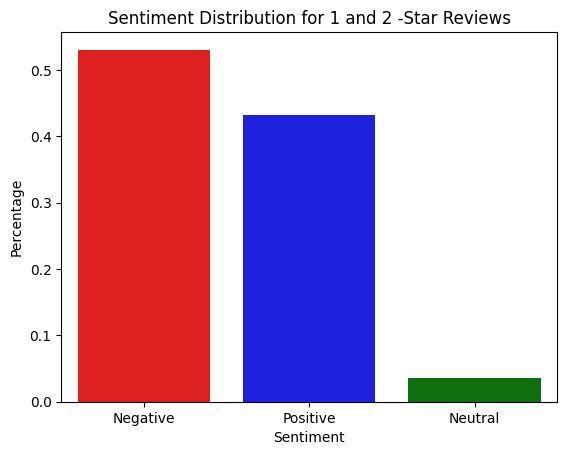

In [ ]:
# Create a bar plot using seaborn,palette
sns.barplot(x=OneStarsentiment_distribution.index, y=OneStarsentiment_distribution.values,palette=['red', 'blue', 'green'])
plt.title('Sentiment Distribution for 1 and 2 -Star Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()


In [ ]:
# Filter rows with 1 and 2 Star reviews
positive_sentiment_df = Sentimentreviews_df[(Sentimentreviews_df["stars"] == 1) | (Sentimentreviews_df["stars"] == 2)]

# Assuming you have a "text" column in your DataFrame, extract the text
positive_sentiment_text = positive_sentiment_df["text"]

In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/NUS/Assignment 1 Topic /cleaned_dataset.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/temp/cleaned_dataset.csv')

# Display the first few rows of the dataset to get an overview
dataset.head()


,stars,useful,restaurant_review,restaurant_name,cleaned_review
0,5.0,2,Amazingly amazing wings and homemade bleu chee...,Fries Rebellion,amazingly amazing wing homemade bleu cheese ri...
1,1.0,4,We arrived a few minutes early for a 7pm reser...,Fries Rebellion,arrive minute early pm reservation ask table h...
2,4.0,1,I wrote this a while ago but never posted it f...,Fries Rebellion,write ago post reason tonight time excellent b...
3,4.0,12,Great cheese steaks and fried pickles...,Fries Rebellion,great cheese steak fry pickle
4,1.0,2,HORRIBLE...To say they forgot our order is an ...,Fries Rebellion,horrible forget order understatement hour craz...


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords as haven't already
nltk.download('stopwords')

# Read JSON files
Sentimentreviews_df = pd.read_json('/content/drive/MyDrive/NUS/Assignment 1 Topic /project-yelp/data/yelp_academic_dataset_review-filtered-sentiment.json')
#Sentimentreviews_df = pd.read_json('/content/drive/MyDrive/temp/yelp_academic_dataset_review-filtered-sentiment.json')

#Preprocessing Data
# Removing everything that is not a letter
Sentimentreviews_df['clean_text'] = Sentimentreviews_df['text'].str.replace("[^a-zA-Z#]", " ")

# Transform data: Normalise Data
Sentimentreviews_df['clean_text'] = Sentimentreviews_df['clean_text'].apply(lambda x: x.lower())

# Function to remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'clean_text' column
Sentimentreviews_df['clean_text'] = Sentimentreviews_df['clean_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-22-c96822a3b3c8>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  Sentimentreviews_df['clean_text'] = Sentimentreviews_df['text'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
# Using the original dataset instead, because we previously filtered by all burger sites
Sentimentreviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment_result,clean_text
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Positive,amazingly amazing wings homemade bleu cheese r...
31,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34,Positive,great burgers fries salad burgers hint salt pe...
49,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,Positive,scale one things awesome place bomb drawn prom...
67,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5,0,0,0,"Traveling through in our RV, stopped over in G...",2016-07-21 17:41:18,Positive,traveling rv stopped granite city found little...
73,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,1,0,0,"If I could give it a zero, I would. I order a ...",2011-08-24 23:07:08,Negative,could give zero would order plain hamburger re...


In [ ]:
Sentimentreviews_df.shape

(445931, 11)

In [ ]:
# DO NOT EXECUTE THIS CELL IF YOU WANT TO RUN THE EXPERIMENTS ON THE ENTIRE DATASET!!!!
import random

# Calculate the number of rows to keep (approximately 2% retention)
#num_rows_to_keep = int(len(Sentimentreviews_df) * 0.02)

# Generate a list of random indices to keep
#random_indices_to_keep = random.sample(range(len(Sentimentreviews_df)), num_rows_to_keep)

# Create a new DataFrame with only the randomly selected rows
#reduced_df = Sentimentreviews_df.iloc[random_indices_to_keep]

# Print the shape of the new DataFrame to verify the number of rows
#print("Original DataFrame shape:", Sentimentreviews_df.shape)
#print("Randomly selected DataFrame shape:", reduced_df.shape)

In [ ]:
# Find POSITIVE and NEGATIVE words semi-automatically
#1) Run LDA to find the topics
#2) Based on the topics, we mannually look for NEGATIVE and POSITIVE words related to these topics
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Load your pre-processed dataset into a pandas DataFrame
# IF YOU WANT TEH ENTIRE EXPERIMENT
df = Sentimentreviews_df
# IF YOU WANT THE 2% EXPERIMENT
#df = reduced_df

print(df.shape)

# Filter out rows with missing or problematic data in the "cleaned_review" column
df = df.dropna(subset=['clean_text'])
df = df[df['clean_text'].apply(lambda x: isinstance(x, str))]

print(df.shape)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(df['clean_text'].apply(lambda x: x.split()))  # Assuming your pre-processed text is space-separated
corpus = [dictionary.doc2bow(text.split()) for text in df['clean_text']]

# Build the LDA model
num_topics = 3  # Specify the number of topics you want
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

(445931, 11)
(445931, 11)


In [ ]:
# Print the topics
#for topic_id, topic in lda_model.print_topics():
#    print(f"Topic {topic_id + 1}: {topic}")

# Print the top 100 words for each topic
for topic_id in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=250)  # Get the top 250 terms for the topic
    topic_words = [dictionary.id2token[term_id] for term_id, _ in topic_terms]  # Convert term IDs to words
    print(f"\n\nTopic {topic_id + 1} Top Words:")
    for word in topic_words:
        # Check if the word contains only letters (no numbers or special characters)
        if word.isalpha():
            print(word)


# Evaluate the coherence score for the model (optional)
coherence_model = CoherenceModel(model=lda_model, texts=df['clean_text'].apply(lambda x: x.split()), dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")


In [ ]:
# Define a list of positive keywords
positive_keywords = [
    "good", "great", "amazing", "excellent", "fantastic", "love", "loved", "best",
    "awesome", "delicious", "tasty", "yummy", "perfect", "nice", "friendly",
    "recommend", "favourite", "favorite", "wonderful", "happy", "pleased",
    "impressed", "satisfying", "worth", "top", "super", "pleasure", "enjoyed"
]

# Filter reviews with 1 or 2 stars
negative_reviews = dataset[dataset['stars'].isin([1.0, 2.0])]

# Identify reviews with positive keywords in the subset
positive_in_negative = negative_reviews[negative_reviews['clean_text'].str.contains('|'.join(positive_keywords), na=False, case=False)]

# Calculate proportions
proportion_positive_in_negative = len(positive_in_negative) / len(negative_reviews)

# Count of reviews with positive keywords in the entire dataset
count_positive_all = dataset[dataset['clean_text'].str.contains('|'.join(positive_keywords), na=False, case=False)].shape[0]

# Proportions z-test
from statsmodels.stats.proportion import proportions_ztest

count = [len(positive_in_negative), count_positive_all]
nobs = [len(negative_reviews), dataset.shape[0]]
stat, pval = proportions_ztest(count, nobs)

len(positive_in_negative), proportion_positive_in_negative, stat, pval

Here are the results :
Out of the reviews with 1 or 2 stars, 32,910 reviews contained positive keywords. The proportion of these "positive" reviews within the 1 or 2 star reviews is approximately

Proportions Z-Test: The code performs a proportions z-test using the proportions_ztest function from the statsmodels library. This test is used to determine if the proportion of reviews with positive keywords in the negative reviews is significantly different from the proportion in the entire dataset.

62.22%. The proportions z-test gave a test statistic of approximately

−119.82 with a p-value of 0.0.

Given the extremely low p-value, we can reject the null hypothesis and conclude that there is a statistically significant difference in the representation of positive sentiment in 1 or 2 star reviews compared to the entire dataset. This suggests that positive sentiments are indeed underrepresented in 1 or 2 star reviews.

In [ ]:
with open('/content/drive/MyDrive/NUS/Assignment 1 Topic /project-yelp/data/all_burger_joint_ids.txt', 'r') as f:
    all_burger_joint_ids = json.loads(f.read())

with open('/content/drive/MyDrive/NUS/Assignment 1 Topic /project-yelp/data/burger_busters_ids.txt', 'r') as f:
    burger_busters_ids = json.loads(f.read())

In [ ]:
#FiltersBurger All BJ Review
Reviewall_burgerjoint_df=Sentimentreviews_df[~Sentimentreviews_df['business_id'].isin(burger_busters_ids)]

In [ ]:
Reviewall_burgerjoint_df.shape

In [ ]:
#FiltersBurger  BB Review
Reviewburgerbusters_df=Sentimentreviews_df[Sentimentreviews_df['business_id'].isin(burger_busters_ids)]

In [ ]:
Reviewburgerbusters_df.shape

In [ ]:
#Test Appoarch
Reviewburgerbusters_df.sentiment_result.value_counts() / len(Reviewburgerbusters_df)

In [ ]:
#Test Appoarch
Reviewburgerbusterssentiment_distribution=Reviewburgerbusters_df.sentiment_result.value_counts() / len(Reviewburgerbusters_df)

In [ ]:
# Create a bar plot using seaborn
sns.barplot(x=Reviewburgerbusterssentiment_distribution.index, y=Reviewburgerbusterssentiment_distribution.values, palette=['red', 'blue', 'green'])
plt.title('Burger Busters Review Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#Test Appoarch
Reviewall_burgerjoint_df.sentiment_result.value_counts() / len(Reviewall_burgerjoint_df)

In [ ]:
#Test Appoarch
ReviewAll_burger_joint_sentiment_distribution = Reviewall_burgerjoint_df.sentiment_result.value_counts() / len(Reviewall_burgerjoint_df)

In [ ]:
# Create a bar plot
sns.barplot(x=ReviewAll_burger_joint_sentiment_distribution.index, y=ReviewAll_burger_joint_sentiment_distribution.values, palette=['blue', 'red', 'green'])
plt.title('Review All Burger Joint Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#Result: Below the average on review sentiment and stars (10%). Average 5 Star =37%
Reviewburgerbusters_df.stars.value_counts() / len(Reviewburgerbusters_df)

In [ ]:
# Assuming Reviewburgerbusters_df is your DataFrame
star_distribution = Reviewburgerbusters_df['stars'].value_counts() / len(Reviewburgerbusters_df)

# Create a bar plot using seaborn
sns.barplot(x=star_distribution.index, y=star_distribution.values)
plt.title('Burger Busters Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Percentage')
plt.show()

In [ ]:
Reviewall_burgerjoint_df.stars.value_counts() / len(Reviewall_burgerjoint_df)

In [ ]:
# Assuming Reviewall_burgerjoint_df is your DataFrame
star_distribution = Reviewall_burgerjoint_df['stars'].value_counts() / len(Reviewall_burgerjoint_df)

# Create a bar plot using seaborn
sns.barplot(x=star_distribution.index, y=star_distribution.values)
plt.title(' All Burger Joint Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Percentage')
plt.show()

In [ ]:
positive_reviews_df = Reviewburgerbusters_df[(Reviewburgerbusters_df ['stars'] == 5)]

In [ ]:
# Print the number of matching reviews
print("Number of matching reviews:", len(positive_reviews_df))

In [ ]:
# Concatenate all positive review texts into a single string
positive_review_text = ' '.join(positive_reviews_df['text'])

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive_review_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Filter rows with 1 Star DF
first = Reviewburgerbusters_df[Reviewburgerbusters_df["stars"] == 1]

# Filter rows with 2 Star DF
second = Reviewburgerbusters_df[Reviewburgerbusters_df["stars"] == 2]

negative_reviews_df  = pd.concat([first, second])

In [ ]:
# Print the number of matching reviews
print("Number of matching reviews:", len(negative_reviews_df ))

In [ ]:
# Concatenate all positive review texts into a single string
negative_review_text = ' '.join(negative_reviews_df['text'])

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_review_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#1. Process BB 5 Star; then 1 Star
#2. Prcess AllBJ 5 Starl then 1 Star

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
# List of topics that we want to analyze
aspects = ['time', 'food','service','atmosphere','location'] #1. Food 2 atmosphere / location 3 Service and waiting time

In [ ]:
#FiltersBurger BB 1Star
BBReviewOneStar= Reviewburgerbusters_df[Reviewburgerbusters_df["stars"] == 1]

In [ ]:
#FiltersBurger BB 5Star
BBReviewFiveStar= Reviewburgerbusters_df[Reviewburgerbusters_df["stars"] == 5]

In [ ]:
#FiltersBurger AllBJ 1Star
AllBJReviewOneStar= Reviewall_burgerjoint_df[Reviewall_burgerjoint_df["stars"] == 1]

In [ ]:
#FiltersBurger AllBJ 5Star
AllBJReviewFiveStar= Reviewall_burgerjoint_df[Reviewall_burgerjoint_df["stars"] == 5]

In [ ]:
# Function to tokenize and count word frequencies
def build_frequency_table(dataframe, column_name, top_n=10):
  # Join all the text in the column into a single string
  text = ' '.join(dataframe[column_name])

  # Tokenize the text into words (you might need more advanced tokenization depending on your use case)
  words = re.findall(r'\w+', text.lower())  # Converts to lowercase and tokenizes

  # Remove English stopwords
  english_stopwords = set(stopwords.words('english'))
  words = [word for word in words if word not in english_stopwords]

  # Count the frequency of each word using Counter
  word_frequencies = Counter(words)

  # Convert the word frequencies to a DataFrame
  frequency_df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
  frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

  # Filter to get only the top n words
  top_words_df = frequency_df.head(top_n)

  return top_words_df

In [ ]:
#Https://towardsdatascience.com/simple-method-of-targeted-tf-idf-topic-modeling-using-yelp-open-dataset-298e019d6c09

In [ ]:
# Uses Star. Noted Issue on Negative for  Sentiment
# Iterate through the aspects/topics list
for aspect in aspects:
  print("\n\n\n=== " + aspect + " ===")

  # Filtered all the TIPS that contains the actual aspect/topic within the text
  BBReviewOneStarFiltered = BBReviewOneStar[BBReviewOneStar['text'].str.contains(aspect, na=False)  ]

  print(BBReviewOneStar.shape)
  print( BBReviewOneStarFiltered.shape)

  ft = build_frequency_table( BBReviewOneStarFiltered, 'text')
  display(ft)


In [ ]:
# Define word banks for each topic based on the earlier recommendations
word_banks = {
    "Food": ['burger', 'fry', 'chicken', 'cheese', 'sandwich', 'sauce', 'salad', 'taste', 'beef', 'bread', 'fish', 'shrimp', 'bbq', 'patty', 'crispy'],
    "Service": ['service', 'wait', 'staff', 'server', 'ask', 'tell', 'bartender', 'employee', 'owner'],
    "Ambience/Environment": ['place', 'bar', 'restaurant', 'location', 'night', 'table', 'visit', 'atmosphere', 'live', 'cool', 'house', 'parking'],
    "Price/Value": ['price', 'worth', 'menu', 'expensive', 'cheap', 'value', 'deal'],
    "Overall Experience": ['good', 'great', 'love', 'like', 'best', 'delicious', 'nice', 'friendly', 'amazing', 'recommend', 'happy', 'pleased', 'impressed', 'definitely']
}


from collections import defaultdict

# Function to calculate term frequency for words in a given word bank across a set of documents
def calculate_term_frequency(docs, word_bank):
    term_frequency = defaultdict(int)

    for doc in docs:
        for word in word_bank:
            term_frequency[word] += doc.lower().count(word)

    return term_frequency

# Calculate term frequencies for each word bank
tf_food = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Food'])
tf_service = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Service'])
tf_ambience = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Ambience/Environment'])
tf_price = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Price/Value'])
tf_experience = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Overall Experience'])

tf_food, tf_service, tf_ambience, tf_price, tf_experience


In [ ]:
dataset.head()

In [ ]:
dataset = Sentimentreviews_df
field = "clean_text"

# Define word banks for each topic based on the earlier recommendations
word_banks = {
    "Food": ['burger', 'fry', 'chicken', 'cheese', 'sandwich', 'sauce', 'salad', 'taste', 'beef', 'bread', 'fish', 'shrimp', 'bbq', 'patty', 'crispy'],
    "Service": ['service', 'wait', 'staff', 'server', 'ask', 'tell', 'bartender', 'employee', 'owner'],
    "Ambience/Environment": ['place', 'bar', 'restaurant', 'location', 'night', 'table', 'visit', 'atmosphere', 'live', 'cool', 'house', 'parking'],
    "Price/Value": ['price', 'worth', 'menu', 'expensive', 'cheap', 'value', 'deal'],
    "Overall Experience": ['good', 'great', 'love', 'like', 'best', 'delicious', 'nice', 'friendly', 'amazing', 'recommend', 'happy', 'pleased', 'impressed', 'definitely']
}


# Ensure that the 'cleaned_review' column consists of string values
dataset[field] = dataset[field].astype(str)

def count_word_occurrences(text, words):
    # Split the input text into words
    text_words = text.split()

    # Initialize a variable to store the total count
    total_count = 0

    # Iterate through the words in the text
    for word in text_words:
        # Check if the word is in the word bank
        if word in words:
            # Increment the total count
            total_count += 1

    # Return the total count
    return total_count

# Apply word occurrence counting again
dataset['food_count'] = dataset[field].apply(lambda x: count_word_occurrences(x, word_banks['Food']))
dataset['service_count'] = dataset[field].apply(lambda x: count_word_occurrences(x, word_banks['Service']))
dataset['ambience_count'] = dataset[field].apply(lambda x: count_word_occurrences(x, word_banks['Ambience/Environment']))
#dataset['price_count'] = dataset[field].apply(lambda x: count_word_occurrences(x, word_banks['Price/Value']))
#dataset['experience_count'] = dataset[field].apply(lambda x: count_word_occurrences(x, word_banks['Overall Experience']))

# Display the dataset with the new columns
dataset.head()


In [ ]:
# Fit each sentence in each review by counting up word occurrences in each topic word bank

# Function to split reviews into sentences and count word occurrences for each sentence
def count_occurrences_by_sentence(review, word_bank):
    sentences = sent_tokenize(review)
    counts = [count_word_occurrences(sentence, word_bank) for sentence in sentences]
    return counts

# Apply the function for each topic
dataset['food_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Food']))
dataset['service_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Service']))
dataset['ambience_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Ambience/Environment']))
dataset['price_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Price/Value']))
dataset['experience_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Overall Experience']))

# Display the dataset with the new columns
dataset[['cleaned_review', 'food_counts_by_sentence', 'service_counts_by_sentence', 'ambience_counts_by_sentence', 'price_counts_by_sentence', 'experience_counts_by_sentence']].head()